# Neural Network for image classification 4

## Train and Test

In [71]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns

In [43]:
dataset = pd.read_csv('features.csv')

In [44]:
type(dataset)

pandas.core.frame.DataFrame

In [45]:
dataset.head()

,mouth,pants,shoes,tshirt,shorts,sneakers,class
0,0.0,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.0,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.0,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.0,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.0,0.000000,0.029708,8.978929,3.459119,3.459119,0


### Select X and y

In [115]:
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

In [116]:
type(y), type(X)

(numpy.ndarray, numpy.ndarray)

### Split to test and train

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [118]:
X_train.shape, y_train.shape

((215, 6), (215,))

In [119]:
X_test.shape, y_test.shape

((54, 6), (54,))

### Building and training the neural network

In [120]:
import tensorflow as tf
from tensorflow import keras

In [121]:
network2 = tf.keras.models.Sequential()
network2.add(tf.keras.layers.Dense(input_shape = (6, ), units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [122]:
network2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [123]:
network2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
history = network2.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 0.7606 - accuracy: 0.4558
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.6140
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.6140
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6140
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6140
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6140
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6140
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.6140
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6140
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.6140
Epoch 11/50
7/7 [======================

### Evaluation

In [125]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

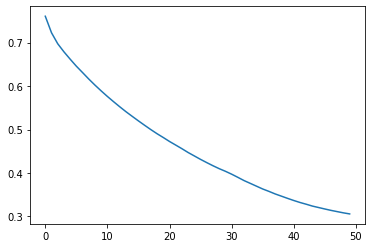

In [126]:
plt.plot(history.history['loss']);

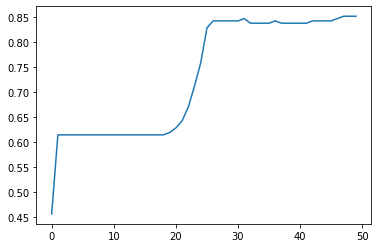

In [127]:
plt.plot(history.history['accuracy']);

In [128]:
X_test.shape

(54, 6)

In [129]:
predictions = network2.predict(X_test)
predictions

# 0 is Bart, 1 is Homer

array([[1.7607212e-03],
       [7.3818165e-01],
       [1.6994771e-01],
       [5.7897186e-01],
       [8.8217646e-02],
       [7.5489902e-01],
       [3.7858001e-05],
       [1.0532835e-01],
       [3.9179653e-02],
       [4.8073858e-02],
       [2.8255779e-01],
       [9.6037745e-01],
       [6.3119823e-01],
       [1.4881194e-03],
       [5.7767206e-01],
       [9.4721520e-01],
       [5.8527988e-01],
       [8.6766154e-01],
       [5.7144320e-01],
       [1.8239409e-01],
       [8.4093350e-05],
       [9.0084827e-01],
       [6.3244104e-01],
       [8.1193149e-03],
       [1.2993813e-04],
       [9.2274487e-01],
       [5.8874297e-01],
       [1.1281270e-01],
       [7.9236156e-01],
       [9.4974464e-01],
       [6.3244104e-01],
       [9.8864669e-01],
       [9.2909122e-01],
       [5.9114248e-01],
       [9.7954810e-01],
       [6.3244104e-01],
       [4.1298777e-02],
       [3.6465675e-02],
       [5.7825309e-01],
       [1.8650246e-01],
       [6.3244104e-01],
       [5.781843

### Define the threshold to convert the probabilities into classes

In [130]:
predictions = (predictions > 0.5)
predictions[:10]

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False]])

### Compare the results to the expected values

In [131]:
y_test[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8888888888888888

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions, labels=[0,1])
cm

array([[22,  6],
       [ 0, 26]])

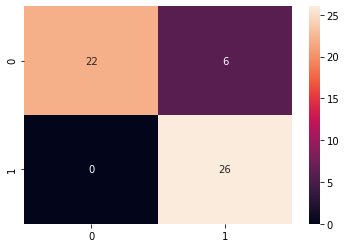

In [134]:
sns.heatmap(cm, annot=True);

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.81      1.00      0.90        26

    accuracy                           0.89        54
   macro avg       0.91      0.89      0.89        54
weighted avg       0.91      0.89      0.89        54



### Saving and loading the network

In [136]:
model_json = network2.to_json()
with open('network2.json', 'w') as json_file:
    json_file.write(model_json)

In [137]:
from keras.models import save_model
network2_saved = save_model(network2, 'weights2.hdf5')

In [138]:
with open('network2.json') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 6], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_4_input"}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "batch_input_shape": [null, 6], "dtype": "float32", "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_5", "trainable": true, "dtype": "float32", "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bi

In [139]:
network2_loaded = tf.keras.models.model_from_json(json_saved_model)
network2_loaded.load_weights('weights2.hdf5')
network2_loaded.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [140]:
network2_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### Classify a single image

In [141]:
test_image = X_test[0]
test_image

array([3.07645000e-03, 0.00000000e+00, 0.00000000e+00, 6.49515459e+00,
       5.59913859e+00, 5.59913859e+00])

In [142]:
test_image.shape

(6,)

In [144]:
test_image = test_image.reshape(1, -1)
test_image.shape

(1, 6)

In [145]:
network2_loaded.predict(test_image)[0][0]

0.0017607212

In [146]:
if network2_loaded.predict(test_image)[0][0] < 0.5:
    print('Bart')
else:
    print('Homer')

Bart
